In [42]:
import planetary_computer as pc
import xarray as xr
from xrspatial import hillshade
from datashader.transfer_functions import shade, stack
from datashader.colors import Elevation
from matplotlib import pyplot as plt
import shapely.wkt
from pystac_client import Client
 

In [43]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1")

In [83]:
return_data = catalog.search(collections=["nasadem"], 
                             #intersects=areas_of_interest, 
                             bbox=[5, , 77.12486872733885 , 28.58609243100243])


SyntaxError: invalid syntax (3127867322.py, line 3)

In [84]:
return_items = [item for item in return_data.get_items()]
signed_asset = pc.sign(return_items[0].assets["elevation"])

In [85]:
da = (
    xr.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")[:-1, :-1]
    .coarsen({"y": 5, "x": 5})
    .mean()
)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


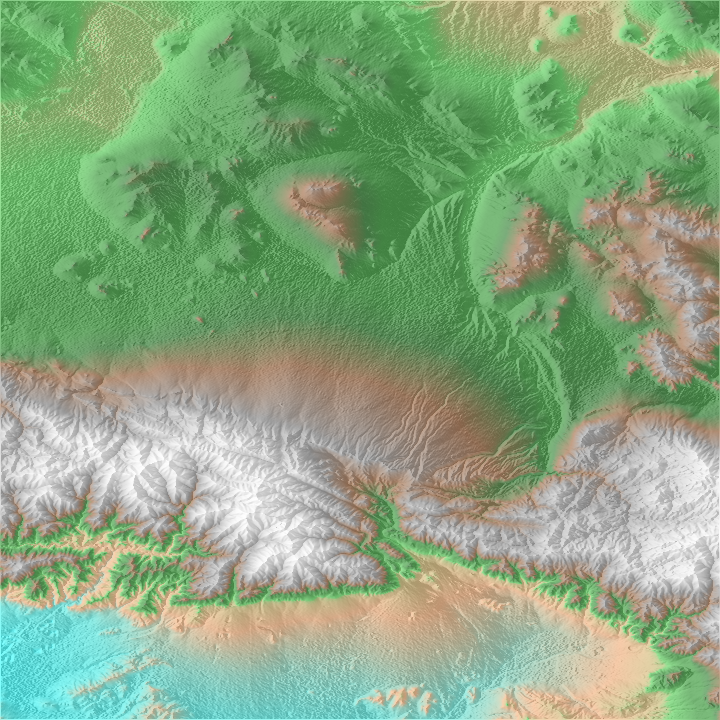

In [86]:
# Render the hillshade with a coloramp of the values applied on top
shaded = hillshade(da, azimuth=100, angle_altitude=50)
stack(shade(shaded, cmap=["white", "gray"]), shade(da, cmap=Elevation, alpha=128))

In [87]:
da

<xarray.DataArray (y: 720, x: 720)>
array([[ 779.16,  776.32,  779.6 , ...,  844.04,  842.52,  840.12],
       [ 776.48,  776.64,  780.04, ...,  841.48,  838.6 ,  835.4 ],
       [ 774.08,  773.76,  776.8 , ...,  838.24,  835.4 ,  832.68],
       ...,
       [ 310.08,  296.12,  275.72, ...,  983.44,  999.2 , 1015.88],
       [ 306.56,  286.72,  279.36, ...,  968.72,  991.64, 1034.16],
       [ 279.4 ,  263.  ,  253.56, ...,  971.12,  999.72, 1029.68]])
Coordinates:
  * y        (y) float64 35.0 35.0 35.0 35.0 34.99 ... 34.01 34.0 34.0 34.0
  * x        (x) float64 -118.0 -118.0 -118.0 -118.0 ... -117.0 -117.0 -117.0
Attributes:
    transform:      (0.0002777777777777778, 0.0, -118.00013888888888, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.0002777777777777778, 0.0002777777777777778)
    is_tiled:       1
    nodatavals:     (-32768.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    units:          ('m',)
    AREA_OR_POINT:  Point

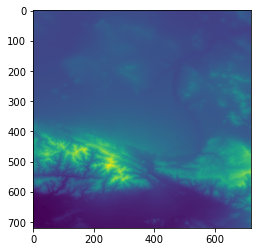

In [88]:
plt.imshow(da)

In [107]:
import pandas as pd
import numpy as np

grid_data = pd.read_csv("./grid_metadata.csv")

In [104]:
elevations = []
for g in  grid_data['wkt']:
    P = shapely.wkt.loads(g)
    coords = [P.exterior.coords[2][0], P.exterior.coords[0][1], P.exterior.coords[0][0], P.exterior.coords[2][1]]
    print(coords)
        
    return_data = catalog.search(collections=["nasadem"], bbox=coords)
    
    return_items = [item for item in return_data.get_items()]
    signed_asset = pc.sign(return_items[0].assets["elevation"])
    
    
    # filter to just regions 
    da = (xr.open_rasterio(signed_asset.href).squeeze().drop("band")[:-1, :-1].coarsen({"y": 5, "x": 5}).mean())
    
    x_coords = np.where((da.x>=coords[0]) & (da.x<= coords[2])) 
    y_coords = np.where((da.y>=coords[1]) & (da.y<= coords[3]))
    
    min_x = min(x_coords[0])
    max_x = max(x_coords[0])

    min_y = min(y_coords[0])
    max_y = max(y_coords[0])
    
    subset =  da[min_x:max_x, min_y:max_y]
    
    elevations.append(np.mean(subset[0].to_numpy()))
        
#     plt.imshow(da)    
#     plt.show()

[121.4808486829302, 24.97766123020391, 121.5257644471362, 25.01836939334328]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.25961601995678, 28.54664454217707, 77.30453178416276, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.9787405899055, 33.79558357488509, -117.9338248256995, 33.83290166381627]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.0350371989269, 28.54664454217707, 77.07995296313287, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.54664454217707, 77.12486872733885, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[76.90028990630897, 28.54664454217707, 76.94520567051495, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.58609243100243, 77.12486872733885, 28.62552552598286]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.25961601995678, 28.46770443564941, 77.30453178416276, 28.50718187266299]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.5257644471362, 25.01836939334328, 121.5706802113421, 25.05906406274214]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.16978449154482, 28.62552552598286, 77.21470025575081, 28.66494381399507]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.5257644471362, 25.05906406274214, 121.5706802113421, 25.09974522235117]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.4397514194338, 33.98201108613195, -117.3948356552278, 34.01924766510738]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.21470025575081, 28.58609243100243, 77.25961601995678, 28.62552552598286]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.21470025575081, 28.70434728194878, 77.25961601995678, 28.74373591678664]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.16978449154482, 28.50718187266299, 77.21470025575081, 28.54664454217707]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.25961601995678, 28.66494381399507, 77.30453178416276, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.12486872733885, 28.70434728194878, 77.16978449154482, 28.74373591678664]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.30453178416276, 28.66494381399507, 77.34944754836873, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.3829824677593, 34.16803061743935, -118.3380667035533, 34.20518547216206]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.6643302404637, 34.09367183102137, -117.6194144762577, 34.13085940091023]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[76.99012143472092, 28.58609243100243, 77.0350371989269, 28.62552552598286]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.5295829478457, 33.98201108613195, -117.4846671836398, 34.01924766510738]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.2033194109354, 33.83290166381627, -118.1584036467294, 33.87020346808818]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.74373591678664, 77.12486872733885, 28.7831097054843]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.46770443564941, 77.12486872733885, 28.50718187266299]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.16978449154482, 28.66494381399507, 77.21470025575081, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.5626455245832, 34.16803061743935, -118.5177297603772, 34.20518547216206]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.16978449154482, 28.54664454217707, 77.21470025575081, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.66494381399507, 77.12486872733885, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.21470025575081, 28.62552552598286, 77.25961601995678, 28.66494381399507]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.5706802113421, 25.01836939334328, 121.6155959755481, 25.05906406274214]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.12486872733885, 28.62552552598286, 77.16978449154482, 28.66494381399507]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.07995296313287, 28.82246863505031, 77.12486872733885, 28.86181269252625]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.21470025575081, 28.54664454217707, 77.25961601995678, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.2482351751414, 34.05646791625069, -118.2033194109354, 34.09367183102137]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.16978449154482, 28.70434728194878, 77.21470025575081, 28.74373591678664]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[76.90028990630897, 28.66494381399507, 76.94520567051495, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.5626455245832, 34.35364110514904, -118.5177297603772, 34.39071402523285]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.0350371989269, 28.70434728194878, 77.07995296313287, 28.74373591678664]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.12486872733885, 28.66494381399507, 77.16978449154482, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.25961601995678, 28.50718187266299, 77.30453178416276, 28.54664454217707]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-118.2482351751414, 33.87020346808818, -118.2033194109354, 33.9074889790035]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.4808486829302, 25.05906406274214, 121.5257644471362, 25.09974522235117]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.12486872733885, 28.7831097054843, 77.16978449154482, 28.82246863505031]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.0350371989269, 28.74373591678664, 77.07995296313287, 28.7831097054843]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-116.9007622489621, 33.9074889790035, -116.8558464847561, 33.94475818789627]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.12486872733885, 28.54664454217707, 77.16978449154482, 28.58609243100243]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.6194144762577, 34.01924766510738, -117.5744987120517, 34.05646791625069]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.4808486829302, 25.01836939334328, 121.5257644471362, 25.05906406274214]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[121.4808486829302, 25.09974522235117, 121.5257644471362, 25.14041285615363]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.25961601995678, 28.62552552598286, 77.30453178416276, 28.66494381399507]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[77.0350371989269, 28.66494381399507, 77.07995296313287, 28.70434728194878]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.8889090614936, 34.13085940091023, -117.8439932972876, 34.16803061743935]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


[-117.3499198910219, 33.64614854761477, -117.3050041268159, 33.68353168758084]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


In [124]:
grid_data['elevations'] = elevations

In [126]:
grid_data.to_csv("elevation_data.csv")

In [125]:
grid_data

,grid_id,location,tz,wkt,elevations
0,1X116,Taipei,Asia/Taipei,"POLYGON ((121.5257644471362 24.97766123020391,...",0.000000
1,1Z2W7,Delhi,Asia/Calcutta,"POLYGON ((77.30453178416276 28.54664454217707,...",216.754286
2,3S31A,Los Angeles (SoCAB),Etc/GMT+8,POLYGON ((-117.9338248256995 33.79558357488509...,301.987692
3,6EIL6,Delhi,Asia/Calcutta,"POLYGON ((77.07995296313287 28.54664454217707,...",224.335714
4,7334C,Delhi,Asia/Calcutta,"POLYGON ((77.12486872733885 28.54664454217707,...",216.007143
5,78V83,Delhi,Asia/Calcutta,"POLYGON ((76.94520567051495 28.54664454217707,...",292.071429
6,7F1D1,Delhi,Asia/Calcutta,"POLYGON ((77.12486872733885 28.58609243100243,...",221.182222
7,8KNI6,Delhi,Asia/Calcutta,"POLYGON ((77.30453178416276 28.46770443564941,...",216.497778
8,90BZ1,Taipei,Asia/Taipei,"POLYGON ((121.5706802113421 25.01836939334328,...",0.000000
9,90S79,Delhi,Asia/Calcutta,"POLYGON ((77.21470025575081 28.62552552598286,...",220.450000
